In [2]:
import h5py
import pandas as pd
import numpy as np
from decimal import Decimal
import matplotlib.pyplot as plt

In [32]:
%tensorboard --logdir /home/jessica/personalized_driving_toyota/

UsageError: Line magic function `%tensorboard` not found.


In [3]:
def get_speed(vel):
    assert(len(vel) == 3)
    return (Decimal(vel[0]) ** Decimal(2) + Decimal(vel[1]) ** Decimal(2) + Decimal(vel[2]) ** Decimal(2)) ** Decimal(0.5)

def angle(v1, v2):
    v1 = [Decimal(v1[0].item()), Decimal(v1[1].item()), Decimal(v1[2].item())]
    v2 = [Decimal(v2[0].item()), Decimal(v2[1].item()), Decimal(v2[2].item())]
    # [0, np.pi]
    num = np.dot(v1, v2)
    denom = (get_speed(v1) * get_speed(v2))
    return np.arccos(float(num / denom)) 

def dist(p1, p2):
    return get_speed(np.array(p1) - np.array(p2))

In [66]:
data_path = "/data1/jessica/data/toyota/once_w_lanes_compressed_raw_small_multitask_0-13.hfd5"
paths = [data_path]
people_seqs = []
subsample = 2
with h5py.File(data_path, "r") as f:
    for i, seq_key in enumerate(list(f.keys())):
        iter_dict = {}
        keys_ = f[seq_key].keys()

        orig_times = f[seq_key]["orig_times"][()]
        sorted_idx = np.argsort(orig_times)
        orig_times = [orig_times[i] for i in sorted_idx]
        iter_dict['orig_times'] = orig_times
        for key in keys_:
            if key in ["angle", 'orig_times']: continue
            ds_obj = f[seq_key][key][()]#[0::subsample]
            #ds_obj = [ds_obj[i] for i in sorted_idx]
            if key == "pos":
                iter_dict[key] = ds_obj
                new_angles = [0]
                for i in range(1, len(ds_obj)):
                    prev = ds_obj[i-1]
                    curr = ds_obj[i]
                    an = angle(prev, curr)*(180/np.pi)
                    new_angles.append(an)
                ds_obj = new_angles
                iter_dict["angle"] = ds_obj
                
                continue
            iter_dict[key] = ds_obj
        people_seqs.append(iter_dict)


In [59]:
people_seqs[0]['orig_times'][0] <= people_seqs[0]['orig_times'][1], people_seqs[0]['orig_times'][2]<= people_seqs[0]['orig_times'][3], 

(True, True)

In [70]:
people_seqs[2]["orig_times"][0:9]

[1616007135232,
 1616007266304,
 1616007266304,
 1616007266304,
 1616007266304,
 1616007266304,
 1616007266304,
 1616007266304,
 1616007266304]

In [10]:
for seq in people_seqs:
    print(len(seq['distance']))


261
399
25
84
122
214
240
334
293
96
106
424
122


261


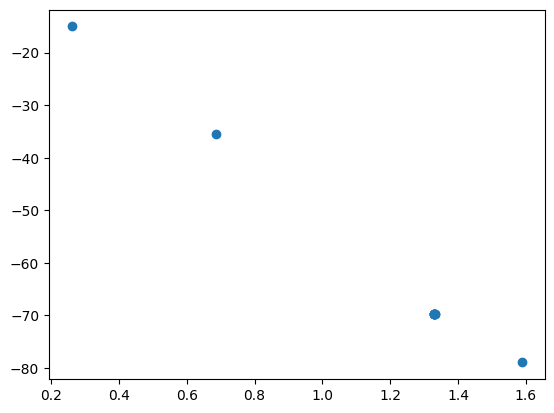

In [32]:
x = np.array(people_seqs[0]['pos'])[:,0]
z = np.array(people_seqs[0]['pos'])[:,2]
print(len(x))
plt.scatter(z[0:10], x[0:10])
#plt.plot(z[0:10], x[0:10])

(1616005400000.0,
 1616006000000.0,
 1616006000000.0,
 1616006000000.0,
 1616005800000.0)

In [59]:
def get_speed(vel):
    return (Decimal(vel[0]) ** Decimal(2) + Decimal(vel[1]) ** Decimal(2)) ** Decimal(0.5)
def angle(v1, v2):
    v1 = [Decimal(v1[0]), Decimal(v1[1])]
    v2 = [Decimal(v2[0]), Decimal(v2[1])]
    # [0, np.pi]
    num = np.dot(v1, v2)
    denom = (get_speed(v1) * get_speed(v2))
    return np.arccos(float(num / denom)) 

angle([,1], [1,2])*(180/np.pi)

18.434948822922017

In [15]:
a = np.arctan2(1,0)
b = np.arctan2(2,1)

In [16]:
a-b

0.46364760900080615

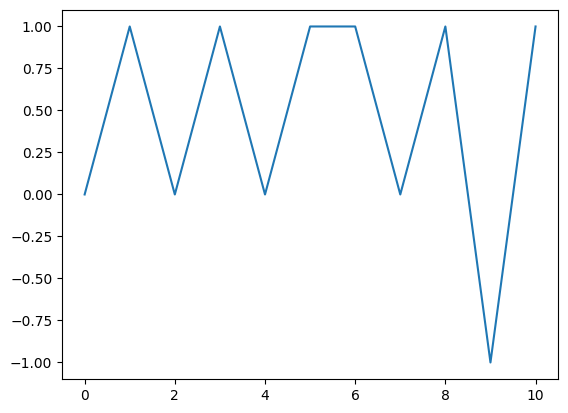

In [70]:
b = np.array([[0, 0], [1, 1], [2, 0], [3, 1], [4, 0], [5, 1], [6, 1], [7, 0], [8, 1], [9, -1], [10, 1]])


plt.plot(b[:,0], b[:,1])

In [71]:
for i in range(len(b[1:])):
    last =b[i-1]
    nexts = b[i]
    prev = np.arctan2(last[0], last[1])*180/np.pi
    ne = np.arctan2(nexts[0], nexts[1])*180/np.pi
    #print(ne-prev)
    dX = b[i-1][0] - b[i][0]
    dZ = b[i-1][1] - b[i][1]

    yaw = np.arctan2(dZ, dX)*180/np.pi 
    yaw = np.arctan2(dX, dZ)*180/np.pi 
    print('yawwwwwwwww', yaw+90)


yawwwwwwwww 174.28940686250036
yawwwwwwwww -45.0
yawwwwwwwww 45.0
yawwwwwwwww -45.0
yawwwwwwwww 45.0
yawwwwwwwww -45.0
yawwwwwwwww 0.0
yawwwwwwwww 45.0
yawwwwwwwww -45.0
yawwwwwwwww 63.43494882292201


In [37]:
dX = b[0][0] - b[1][0]
dZ = b[0][1] - b[1][1]

yaw = np.arctan2(dZ, dX)*180/np.pi

In [38]:
yaw

-153.43494882292202